In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree

titanic_df = pd.read_csv('./titanic/train.csv', encoding = 'utf-8')

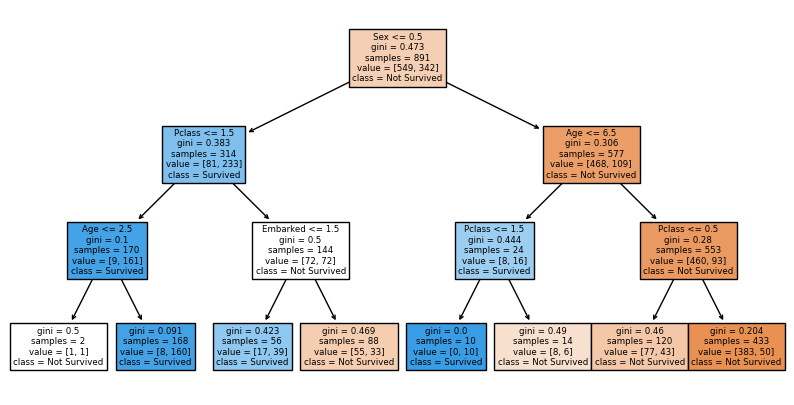

In [21]:
X_features = ['Pclass','Sex','Age','Embarked']
# Pclass : LabelEncoder
# Sex : LabelEncoder
# AGe : 결측치 -> 평균으로 대치

le = LabelEncoder()
titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])

le2 = LabelEncoder()
titanic_df['Pclass'] = le2.fit_transform(titanic_df['Pclass'])

age_mean = titanic_df['Age'].mean()
titanic_df['Age'] = titanic_df['Age'].fillna(age_mean)

le3 = LabelEncoder()
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')
titanic_df['Embarked'] = le3.fit_transform(titanic_df['Embarked'])
X = titanic_df[X_features]
y = titanic_df['Survived']

model_dt = DecisionTreeClassifier(max_depth=3, random_state = 42)
model_dt.fit(X,y)

plt.figure(figsize = (10,5))
plot_tree(model_dt, feature_names = X_features, class_names = ['Not Survived','Survived'], filled = True)
plt.show()



In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

model_lor = LogisticRegression()
model_dt = DecisionTreeClassifier(random_state = 42)
model_rf = RandomForestClassifier(random_state = 42)

model_lor.fit(X,y)
model_dt.fit(X,y)
model_rf.fit(X,y)

y_lor_pred = model_lor.predict(X)
y_dt_pred = model_dt.predict(X)
y_rf_pred = model_rf.predict(X)

def get_score(model_name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred).round(3)
    f1 = f1_score(y_true, y_pred).round(3)
    print(model_name, 'acc 스코어는: ', acc, 'f1_score는: ', f1)
    


In [25]:
get_score('lor',y,y_lor_pred)
get_score('dt',y,y_dt_pred)
get_score('rf', y, y_rf_pred)

lor acc 스코어는:  0.79 f1_score는:  0.723
dt acc 스코어는:  0.901 f1_score는:  0.861
rf acc 스코어는:  0.901 f1_score는:  0.867


In [16]:
model_rf.feature_importances_ #각 피처 중요도

array([0.17077185, 0.40583981, 0.42338834])

In [17]:
X_features

['Pclass', 'Sex', 'Age']

KNN, 군집화

In [19]:
!pip install xgboost
!pip install lightgbm

     ---------------------------------------- 99.8/99.8 MB 1.8 MB/s eta 0:00:00
     ---------------------------------------- 1.3/1.3 MB 2.1 MB/s eta 0:00:00


In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

model_knn = KNeighborsClassifier()
model_gbm = GradientBoostingClassifier()
model_xgb = XGBClassifier()
model_lgb = LGBMClassifier()

model_knn.fit(X,y)
model_gbm.fit(X,y)
model_xgb.fit(X,y)
model_lgb.fit(X,y)

y_knn_pred = model_knn.predict(X)
y_gbm_pred = model_gbm.predict(X)
y_xgb_pred = model_xgb.predict(X)
y_lgb_pred = model_lgb.predict(X)


get_score('lor',y,y_lor_pred)
get_score('dt',y,y_dt_pred)
get_score('rf', y, y_rf_pred)
get_score('knn',y,y_knn_pred)
get_score('gbm',y,y_gbm_pred)
get_score('xgb', y, y_xgb_pred)
get_score('lgb', y, y_lgb_pred)

[LightGBM] [Info] Number of positive: 342, number of negative: 549
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000043 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 74
[LightGBM] [Info] Number of data points in the train set: 891, number of used features: 4
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383838 -> initscore=-0.473288
[LightGBM] [Info] Start training from score -0.473288
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

c:\Users\and_c\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


lor acc 스코어는:  0.79 f1_score는:  0.723
dt acc 스코어는:  0.901 f1_score는:  0.861
rf acc 스코어는:  0.901 f1_score는:  0.867
knn acc 스코어는:  0.84 f1_score는:  0.773
gbm acc 스코어는:  0.862 f1_score는:  0.803
xgb acc 스코어는:  0.892 f1_score는:  0.852
lgb acc 스코어는:  0.879 f1_score는:  0.834
